In [ ]:
from torchvision import datasets
import torch
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_folder = '/content/' 

fmnist = datasets.FashionMNIST(data_folder, 
                               download=True,
                               train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder, 
                                   download=True,
                                   train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [ ]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1,1,28,28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self): return len(self.x)

In [ ]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [ ]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    'notice the collate_fn argument'
    trn_dl = DataLoader(train, batch_size=200,
                shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images),
                shuffle=True)
    return trn_dl, val_dl

In [ ]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [ ]:
@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [ ]:
!pip install torch_summary
from torchsummary import summary
model, loss_fn, optimizer = get_model()
summary(model, torch.zeros(1,1,28,28));

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 28, 28]          640
├─MaxPool2d: 1-2                         [-1, 64, 14, 14]          --
├─ReLU: 1-3                              [-1, 64, 14, 14]          --
├─BatchNorm2d: 1-4                       [-1, 64, 14, 14]          128
├─Conv2d: 1-5                            [-1, 128, 14, 14]         73,856
├─MaxPool2d: 1-6                         [-1, 128, 7, 7]           --
├─ReLU: 1-7                              [-1, 128, 7, 7]           --
├─BatchNorm2d: 1-8                       [-1, 128, 7, 7]           256
├─Conv2d: 1-9                            [-1, 256, 7, 7]           295,168
├─MaxPool2d: 1-10                        [-1, 256, 4, 4]           --
├─ReLU: 1-11                             [-1, 256, 4, 4]           --
├─Flatten: 1-12                          [-1, 4096]                --
├─Linear: 1-13                           [-1, 3200]                13,110

In [ ]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
Epoch = 30
for epoch in range(Epoch):
    print("Epoch : " + str(epoch+1) + "/" + str(Epoch))
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    print("Train Epoch Loss : " + str(train_epoch_loss))
    train_accuracies.append(train_epoch_accuracy)
    print("Train Epoch Accuracy : " + str(train_epoch_accuracy))
    val_losses.append(validation_loss)
    print("Validation Loss : " + str(validation_loss))
    val_accuracies.append(val_epoch_accuracy)
    print("Validation Epoch Accuracy : " + str(val_epoch_accuracy))
    print("="*50)

Epoch : 1/30
Train Epoch Loss : 0.3555261778831482
Train Epoch Accuracy : 0.9060166666666667
Validation Loss : 0.3039705455303192
Validation Epoch Accuracy : 0.8861
Epoch : 2/30
Train Epoch Loss : 0.23294505814711253
Train Epoch Accuracy : 0.9067666666666667
Validation Loss : 0.32055899500846863
Validation Epoch Accuracy : 0.8878
Epoch : 3/30
Train Epoch Loss : 0.19838500387966632
Train Epoch Accuracy : 0.9324
Validation Loss : 0.27437904477119446
Validation Epoch Accuracy : 0.899
Epoch : 4/30
Train Epoch Loss : 0.16762979572017989
Train Epoch Accuracy : 0.9407333333333333
Validation Loss : 0.28114405274391174
Validation Epoch Accuracy : 0.903
Epoch : 5/30
Train Epoch Loss : 0.1468786663065354
Train Epoch Accuracy : 0.9517166666666667
Validation Loss : 0.2880750894546509
Validation Epoch Accuracy : 0.913
Epoch : 6/30
Train Epoch Loss : 0.11894116612772147
Train Epoch Accuracy : 0.9691666666666666
Validation Loss : 0.25297069549560547
Validation Epoch Accuracy : 0.9169
Epoch : 7/30
Trai

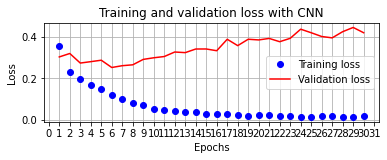

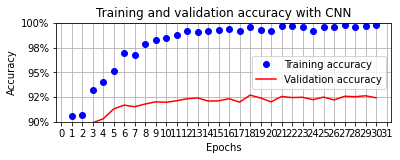

In [ ]:
epochs = np.arange(Epoch)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()